In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns ; sns.set(style = "ticks", color_codes = True)
import pandas as pd
from IPython.display import display

#importing data
df = pd.read_csv('./Datasets/clustering_synthetic_dataset.csv')
display(df)

,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937
...,...,...
745,0.505927,1.213927
746,-1.640461,-0.469973
747,-0.057139,-0.909261
748,-1.169394,0.039597


In [2]:
#Getting an idea of the distribution for each feature
stats = df.describe()
display(stats)

,f1,f2
count,7.500000e+02,7.500000e+02
mean,5.222933e-15,-7.853925e-14
std,1.000667e+00,1.000667e+00
min,-2.274474e+00,-1.823801e+00
25%,-1.091894e+00,-7.775487e-01
50%,3.886712e-01,-4.095144e-01
75%,7.787849e-01,1.052538e+00
max,1.870438e+00,2.245794e+00


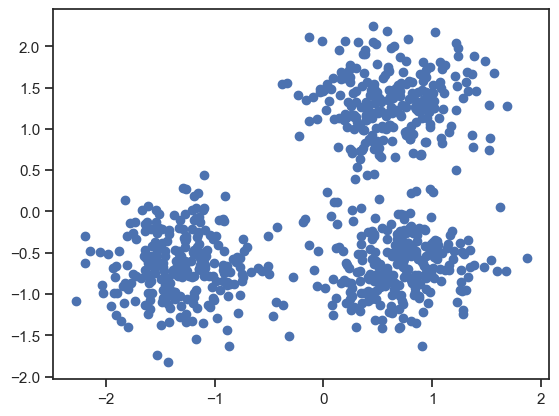

In [3]:
#plotting f1 vs f2
plt.scatter(df['f1'], df['f2'])
plt.show()

## Question 1

It appears that there are 3 distinct clusters in the scatterplot, so I expect there to be 3 species in the dataset.

## Question 2

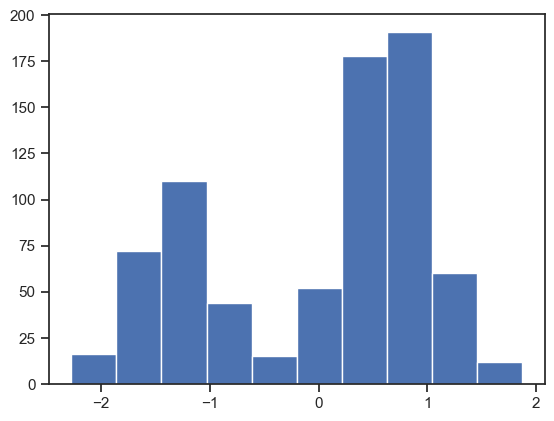

In [4]:
plt.hist(df['f1'])
plt.show()

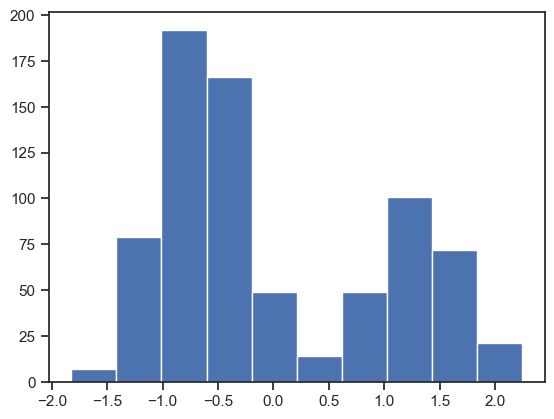

In [5]:
plt.hist(df['f2'])
plt.show()

In [6]:
# Outlier calculation
# Q1 - 1.5*IQR = lower outlier
# Q3 + 1.5*IQR = upper outlier

f1Q1 = stats.loc['25%','f1']
f1Q3 = stats.loc['75%', 'f1']
f1IQR = f1Q3 - f1Q1
f1LowerBound = f1Q1 - (1.5*f1IQR)
f1UpperBound = f1Q3 + (1.5*f1IQR)

f2Q1 = stats.loc['25%','f2']
f2Q3 = stats.loc['75%','f2']
f2IQR = f2Q3 - f2Q1
f2LowerBound = f2Q1 - (1.5*f2IQR)
f2UpperBound = f2Q3 + (1.5*f2IQR)

In [7]:
#f1 outlier check
print('f1 upper outliers?', df['f1'].loc[df['f1']>f1UpperBound].any())
print('f1 lower outliers?', df['f1'].loc[df['f1']<f1LowerBound].any())

f1 upper outliers? False
f1 lower outliers? False


In [8]:
#f2 outlier check
print('f2 upper outliers?', df['f2'].loc[df['f2']>f2UpperBound].any())
print('f2 lower outliers?', df['f2'].loc[df['f2']<f2LowerBound].any())

f2 upper outliers? False
f2 lower outliers? False


### Answer
The range for f1 is -2.274474 to 1.870438.

The range for f2 is -1.823801 to 2.245794.

The distributions are both bimodal and show distinct clustering in the scatterplot. Ranges are similar, both are roughly centered at 0, and standard deviations are equal. Based on the calculations above there are no outliers. Data will still need to be scaled.

## Question 3

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Pipeline with feature scaling to center at 0 with unit variance
KMpipe = make_pipeline(StandardScaler(),
                      KMeans(n_clusters=3,
                            n_init=10,
                            random_state=10,
                            max_iter=400))
# fitting pipeline in separate step for future reference
fitKMpipe = KMpipe.fit(df)

# cluster labels
y_km = fitKMpipe.predict(df)

# getting centroids for plotting
centroids = fitKMpipe.named_steps['kmeans'].cluster_centers_

In [10]:
#Checking  values of centroids
print(centroids)

[[ 0.62260555  1.3172598 ]
 [ 0.6954587  -0.64442334]
 [-1.30266211 -0.65704205]]


In [11]:
# placing kmeans cluster info into new df
dfKM = df.copy()
dfKM['KMcluster'] = y_km
display(dfKM)

,f1,f2,KMcluster
0,0.494261,1.451067,0
1,-1.428081,-0.837064,2
2,0.338559,1.038759,0
3,0.119001,-1.053976,1
4,1.122425,1.774937,0
...,...,...,...
745,0.505927,1.213927,0
746,-1.640461,-0.469973,2
747,-0.057139,-0.909261,1
748,-1.169394,0.039597,2


In [12]:
#calculating distance between points and their centroid
import math
dist = []
for row in dfKM.values:
    cnum = row[2]
    dist+= [math.sqrt( (row[1]-centroids[int(cnum)][1])**2 + (row[0]-centroids[int(cnum)][0])**2 )]
#Adding distance info to dfKM
dfKM['KMdist'] = dist
display(dfKM)

,f1,f2,KMcluster,KMdist
0,0.494261,1.451067,0,0.185410
1,-1.428081,-0.837064,2,0.219403
2,0.338559,1.038759,0,0.397800
3,0.119001,-1.053976,1,0.707133
4,1.122425,1.774937,0,0.677707
...,...,...,...,...
745,0.505927,1.213927,0,0.155858
746,-1.640461,-0.469973,2,0.386139
747,-0.057139,-0.909261,1,0.797836
748,-1.169394,0.039597,2,0.709272


In [13]:
# finding max distance between each centroid and its points
dfKMByClusterStats = dfKM.groupby(['KMcluster']).describe()
display(dfKMByClusterStats)

c1Max = dfKMByClusterStats.loc[0, ('KMdist','max')]
c2Max = dfKMByClusterStats.loc[1, ('KMdist','max')]
c3Max = dfKMByClusterStats.loc[2, ('KMdist','max')]

f1                                                              \
           count      mean       std       min       25%       50%       75%   
KMcluster                                                                      
0          248.0  0.622606  0.391943 -0.376722  0.359299  0.596848  0.914272   
1          250.0  0.695459  0.369519 -0.278976  0.462250  0.710322  0.936171   
2          252.0 -1.302662  0.364679 -2.274474 -1.548185 -1.300860 -1.086936   

                        f2            ...                     KMdist  \
                max  count      mean  ...       75%       max  count   
KMcluster                             ...                              
0          1.687451  248.0  1.317260  ...  1.549891  2.245794  248.0   
1          1.870438  250.0 -0.644423  ... -0.406314  0.273732  250.0   
2         -0.316450  252.0 -0.657042  ... -0.407108  0.435205  252.0   

                                                                       \
               mean       std       min       25%       50%       75%   
KMcluster                                                               
0          0.478302  0.247661  0.036016  0.294453  0.441737  0.648341   
1          0.462651  0.236643  0.024517  0.280552  0.428536  0.614120   
2          0.476349  0.251445  0.018119  0.298010  0.452017  0.631711   

                     
                max  
KMcluster            
0          1.096469  
1          1.177677  
2          1.305332  

[3 rows x 24 columns]

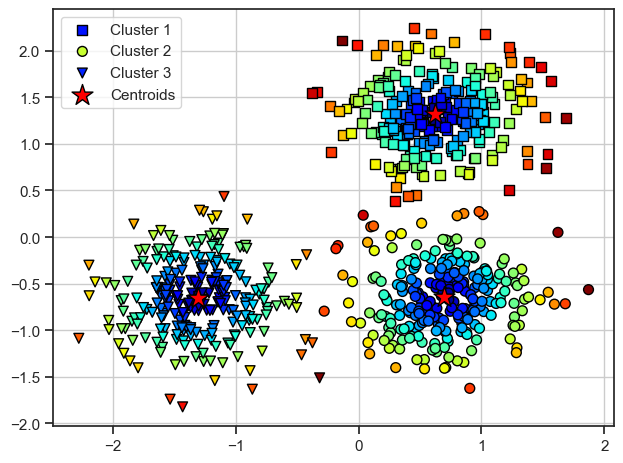

In [14]:
import matplotlib.cm as cm
# plotting  centroids within their clusters
# coloring indicates proximity to centroid, specific to each cluster
# general structure of code from the book, page 357

#plots points for cluster 1
plt.scatter(dfKM['f1'].loc[dfKM['KMcluster']==0],
            dfKM['f2'].loc[dfKM['KMcluster']==0],
            c = dfKM['KMdist'].loc[dfKM['KMcluster']==0]/c1Max,
            cmap = 'jet',
            marker = 's',
            s = 50,
            edgecolors='black',
            label = 'Cluster 1')

#plots points for cluster 2
plt.scatter(dfKM['f1'].loc[dfKM['KMcluster']==1],
            dfKM['f2'].loc[dfKM['KMcluster']==1],
            c = dfKM['KMdist'].loc[dfKM['KMcluster']==1]/c2Max,
            cmap = 'jet',
            marker = 'o',
            s = 50,
            edgecolors='black',
            label = 'Cluster 2')

#plots points for cluster 3
plt.scatter(dfKM['f1'].loc[dfKM['KMcluster']==2],
            dfKM['f2'].loc[dfKM['KMcluster']==2],
            c = dfKM['KMdist'].loc[dfKM['KMcluster']==2]/c3Max,
            s = 50,
            cmap = 'jet',
            marker = 'v',
            edgecolors='black',
            label = 'Cluster 3')

#plots centroids
plt.scatter(centroids[:, 0],
            centroids[:, 1],
            c = 'red',
            marker = '*',
            s = 250,
            edgecolors='black',
            label = 'Centroids')

plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

### Answer

The non-centroid points in each cluster that are in the color range from orange to red are the farthest from their centroid and most likely to be anomalies. Earlier, each point had its distance from its centroid calculated and the descriptive stats for the dfKM grouped by cluster gives the information to calculate outliers.

$(IQR*1.5)+Q3 = $ outlier boundary

## Question 4

In [15]:
from sklearn.cluster import DBSCAN

#parameters chosen after a few tests
DBpipe = make_pipeline(StandardScaler(),
                      DBSCAN(eps = .2,
                            min_samples=10))

y_db = DBpipe.fit_predict(df)

In [16]:
# placing DBSCAN cluster info into new df
dfDB = df.copy()
dfDB['DBcluster'] = y_db
display(dfDB)

,f1,f2,DBcluster
0,0.494261,1.451067,0
1,-1.428081,-0.837064,1
2,0.338559,1.038759,0
3,0.119001,-1.053976,2
4,1.122425,1.774937,0
...,...,...,...
745,0.505927,1.213927,0
746,-1.640461,-0.469973,1
747,-0.057139,-0.909261,-1
748,-1.169394,0.039597,1


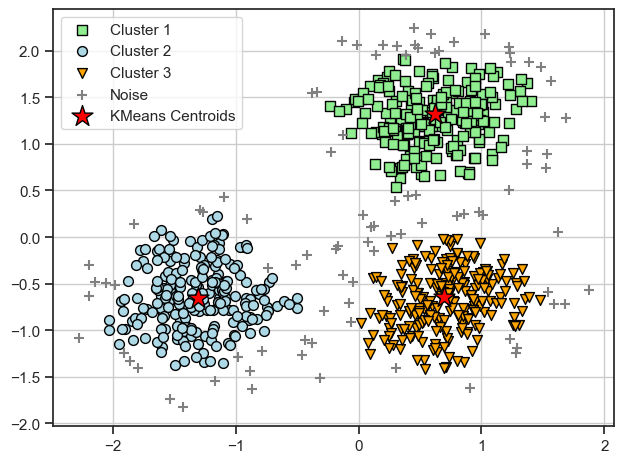

In [17]:
# plotting clusters from DBSCAN
# general structure of code from the book, page 357

#plots points for cluster 1
plt.scatter(dfDB['f1'].loc[dfDB['DBcluster']==0],
            dfDB['f2'].loc[dfDB['DBcluster']==0],
            c = 'lightgreen',
            marker = 's',
            s = 50,
            edgecolors='black',
            label = 'Cluster 1')

#plots points for cluster 1
plt.scatter(dfDB['f1'].loc[dfDB['DBcluster']==1],
            dfDB['f2'].loc[dfDB['DBcluster']==1],
            c = 'lightblue',
            marker = 'o',
            s = 50,
            edgecolors='black',
            label = 'Cluster 2')

#plots points for cluster 1
plt.scatter(dfDB['f1'].loc[dfDB['DBcluster']==2],
            dfDB['f2'].loc[dfDB['DBcluster']==2],
            c = 'orange',
            marker = 'v',
            s = 50,
            edgecolors='black',
            label = 'Cluster 3')

#plots points seen as noisy
plt.scatter(dfDB['f1'].loc[dfDB['DBcluster']==-1],
            dfDB['f2'].loc[dfDB['DBcluster']==-1],
            c = 'gray',
            marker = '+',
            s = 50,
            label = 'Noise')

#plots centroids from KMeans
plt.scatter(centroids[:, 0],
            centroids[:, 1],
            c = 'red',
            marker = '*',
            s = 250,
            edgecolors='black',
            label = 'KMeans Centroids')

plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

### Answer

The points above marked as a gray plus were identified as anomalies. By comparing the graphs from DBSCAN and KMeans, the noisy points seem to align with the points far from the centroids found by KMeans for the most part.

## Question 5 and 6

Below I use the distance information found from the KMeans analysis to plot the outlier barrier around each cluster of the DBSCAN plot to show that it did eliminate anomalies. 

In [18]:
# Getting IQRs then finding outlier boundary using distance quartiles

c1Q1 = dfKMByClusterStats.loc[0, ('KMdist','25%')]
c1Q3 = dfKMByClusterStats.loc[0, ('KMdist','75%')]
c1IQR = c1Q3 - c1Q1
c1UpperBound = c1Q3 + (1.5*c1IQR)

c2Q1 = dfKMByClusterStats.loc[1, ('KMdist','25%')]
c2Q3 = dfKMByClusterStats.loc[1, ('KMdist','75%')]
c2IQR = c2Q3 - c2Q1
c2UpperBound = c2Q3 + (1.5*c2IQR)

c3Q1 = dfKMByClusterStats.loc[2, ('KMdist','25%')]
c3Q3 = dfKMByClusterStats.loc[2, ('KMdist','75%')]
c3IQR = c3Q3 - c3Q1
c3UpperBound = c3Q3 + (1.5*c3IQR)

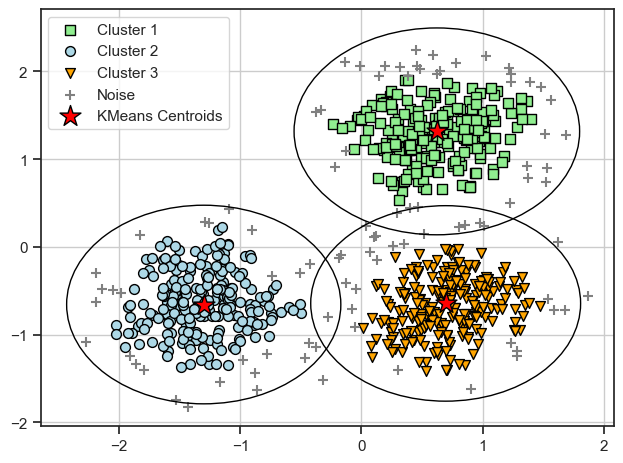

In [19]:
# Plotting DBSCAN info with the addition of the circles

fig, ax = plt.subplots()

#plots points for cluster 1
ax.scatter(dfDB['f1'].loc[dfDB['DBcluster']==0],
            dfDB['f2'].loc[dfDB['DBcluster']==0],
            c = 'lightgreen',
            marker = 's',
            s = 50,
            edgecolors='black',
            label = 'Cluster 1')

#plots points for cluster 1
ax.scatter(dfDB['f1'].loc[dfDB['DBcluster']==1],
            dfDB['f2'].loc[dfDB['DBcluster']==1],
            c = 'lightblue',
            marker = 'o',
            s = 50,
            edgecolors='black',
            label = 'Cluster 2')

#plots points for cluster 1
ax.scatter(dfDB['f1'].loc[dfDB['DBcluster']==2],
            dfDB['f2'].loc[dfDB['DBcluster']==2],
            c = 'orange',
            marker = 'v',
            s = 50,
            edgecolors='black',
            label = 'Cluster 3')

#plots points seen as noisy
ax.scatter(dfDB['f1'].loc[dfDB['DBcluster']==-1],
            dfDB['f2'].loc[dfDB['DBcluster']==-1],
            c = 'gray',
            marker = '+',
            s = 50,
            label = 'Noise')

#plots centroids from KMeans
ax.scatter(centroids[:, 0],
            centroids[:, 1],
            c = 'red',
            marker = '*',
            s = 250,
            edgecolors='black',
            label = 'KMeans Centroids')

#Plots boundary for cluster 1
c1circle = plt.Circle((centroids[0,0], centroids[0,1]), c1UpperBound, fill = False, color = 'black')
ax.add_patch(c1circle)

#Plots boundary for cluster 2
c2circle = plt.Circle((centroids[1,0], centroids[1,1]), c2UpperBound, fill = False, color = 'black')
ax.add_patch(c2circle)

#Plots boundary for cluster 3
c3circle = plt.Circle((centroids[2,0], centroids[2,1]), c3UpperBound, fill = False, color = 'black')
ax.add_patch(c3circle)

plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

The graphs above show that the points above aren't necesarily outliers, but they occupy overlapping space where cluster outliers are being determined. Eliminating these points gives a farm more distinct cluster profile. 

[Text(0.446875, 0.9545454545454546, 'X[0] <= -0.483\ngini = 0.728\nsamples = 750\nvalue = [91, 214, 224, 221]'),
 Text(0.20625, 0.8636363636363636, 'X[1] <= -1.388\ngini = 0.169\nsamples = 247\nvalue = [23, 0, 224, 0]'),
 Text(0.18125, 0.7727272727272727, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0, 0]'),
 Text(0.23125, 0.7727272727272727, 'X[0] <= -2.041\ngini = 0.131\nsamples = 241\nvalue = [17, 0, 224, 0]'),
 Text(0.20625, 0.6818181818181818, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0, 0]'),
 Text(0.25625, 0.6818181818181818, 'X[1] <= 0.105\ngini = 0.097\nsamples = 236\nvalue = [12, 0, 224, 0]'),
 Text(0.1375, 0.5909090909090909, 'X[1] <= -1.204\ngini = 0.059\nsamples = 229\nvalue = [7, 0, 222, 0]'),
 Text(0.05, 0.5, 'X[0] <= -1.734\ngini = 0.444\nsamples = 12\nvalue = [4, 0, 8, 0]'),
 Text(0.025, 0.4090909090909091, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]'),
 Text(0.075, 0.4090909090909091, 'X[0] <= -1.043\ngini = 0.32\nsamples = 10\nvalue = [2, 0, 8, 0]'),
 Text(0.05, 0.3181

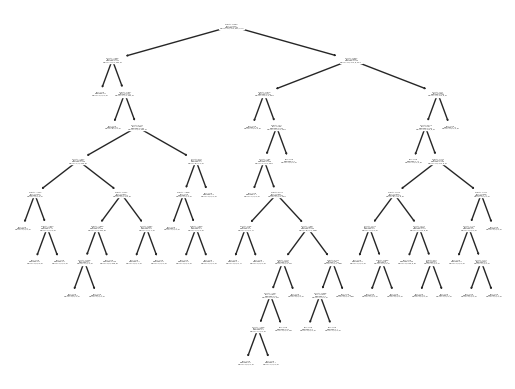

In [32]:
from sklearn import tree

y = dfDB['DBcluster']
t = tree.DecisionTreeClassifier()
t = t.fit(df, y)
tree.plot_tree(t)